# **Dimensionality Reduction Using PCA**

# **Import the necessary python libraries and install pre-requisites**

In [1]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import fetch_openml

# Dimentionality Reduction Techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model
from sklearn.ensemble import RandomForestClassifier

# Evaluation Report
from sklearn.metrics import classification_report

# **Step 1: Load and prepare the Dataset**


* **Dataset: MNIST**, which consists of 70,000 images of handwritten digits (0-9).
* **Availability:** The MNIST dataset is readily available in both TensorFlow and PyTorch libraries, making it easy to load and preprocess.




In [2]:
# Load the dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Split the data set into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 2: Apply Dimensionality Reduction Techniques**

Principal Component Analysis (PCA):

In [3]:
pca = PCA(n_components=50)  # Reduces dataset to 50 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [4]:
# Train a classifier on the reduced dataset
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

t-distributed Stochastic Neighbor Embedding (t-SNE):

In [7]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_train_tsne = tsne.fit_transform(X_train)

# **Step 3: Evaluate the Performances**

We will evaluate the model for **PCA** and visualize the results for **t-SNE**.

In [6]:
# Evaluate the model and generate classification report for PCA
y_pred_pca = rf_pca.predict(X_test_pca)
print("PCA Classification Report:\n", classification_report(y_test, y_pred_pca))

PCA Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.95      0.95      1380
           3       0.92      0.94      0.93      1433
           4       0.94      0.96      0.95      1295
           5       0.95      0.94      0.95      1273
           6       0.97      0.98      0.97      1396
           7       0.96      0.96      0.96      1503
           8       0.94      0.90      0.92      1357
           9       0.95      0.93      0.94      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



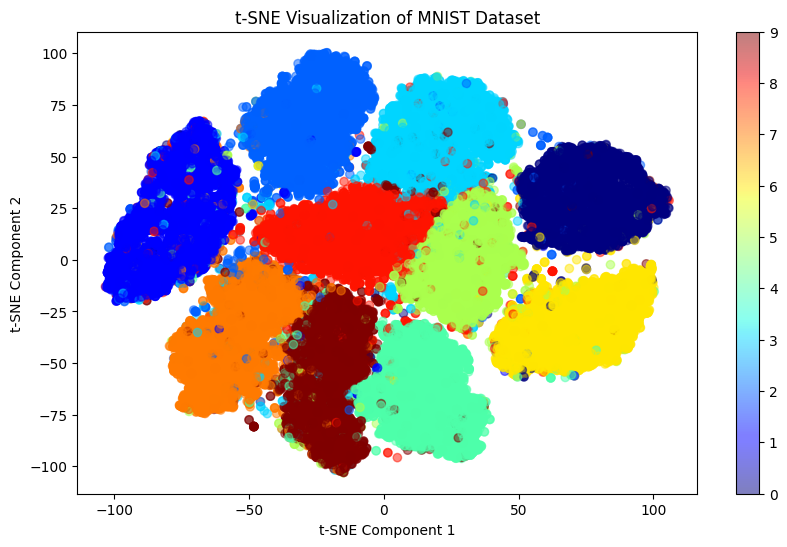

In [8]:
# Visualize the result of t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train.astype(int), cmap='jet', alpha=0.5)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()